# Data Exploration and Cleanup

In [180]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import os
import datetime
from pprint import pprint
import plotly.express as px


In [181]:
parent_folder = 'historical_data'
csv_list = [f for f in os.listdir(parent_folder) if '.csv' in f]
df_list = []
for csv in csv_list:
    df = pd.read_csv(os.path.join(parent_folder, csv))
    df_list.append(df)
master_df = pd.concat(df_list, ignore_index=True)

In [182]:
master_df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,6/01/2015,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
1,22/01/2015,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2,30/03/2015,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
3,27/05/2015,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
4,3/02/2015,KR,Jeonju,co,133,4.5,13.4,7.8,39.24


In [183]:
# Display an overview of the Specie column
master_df["Specie"].unique()

array(['co', 'pm10', 'o3', 'so2', 'no2', 'pm25', 'psi', 'uvi', 'neph',
       'aqi', 'mepaqi', 'pol', 'temperature', 'humidity', 'pressure',
       'wd', 'wind-speed', 'd', 'pm1', 'wind-gust', 'precipitation',
       'dew', 'wind speed', 'wind gust'], dtype=object)

In [184]:
# Display an overview of the number of rows each Specie has in the dataframe
master_df["Specie"].value_counts()

no2              565392
pm25             552899
pm10             547363
o3               541019
so2              469871
co               429370
temperature      338991
humidity         338874
pressure         336973
wind-speed       327923
dew              230768
wind-gust        214730
wd                30465
precipitation     30222
aqi               19417
uvi               14001
wind speed         4517
pol                4243
wind gust          2875
d                  2031
pm1                1560
neph               1537
mepaqi             1298
psi                 363
Name: Specie, dtype: int64

In [185]:
species_to_remove = ["temperature", "humidity", "pressure", "wind-speed", "dew", "wind-gust",
                     "wind speed", "wind gust", "precipitation", "wd", "aqi", "uvi", "pol", "pm1", "mepaqi", "neph"]

short_airdf = master_df[~master_df["Specie"].isin(species_to_remove)].reset_index(drop=True).copy()

In [186]:
short_airdf.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,6/01/2015,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
1,22/01/2015,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2,30/03/2015,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
3,27/05/2015,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
4,3/02/2015,KR,Jeonju,co,133,4.5,13.4,7.8,39.24


In [187]:
# Overview of the remaining air pollutant species in focus
short_airdf["Specie"].value_counts()

no2     565392
pm25    552899
pm10    547363
o3      541019
so2     469871
co      429370
d         2031
psi        363
Name: Specie, dtype: int64

In [188]:
short_airdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108308 entries, 0 to 3108307
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Date      object 
 1   Country   object 
 2   City      object 
 3   Specie    object 
 4   count     int64  
 5   min       float64
 6   max       float64
 7   median    float64
 8   variance  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 213.4+ MB


In [189]:
short_airdf["Date"] = pd.to_datetime(short_airdf["Date"], format="%d/%m/%Y")

In [190]:
# Double check the Date data type
short_airdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108308 entries, 0 to 3108307
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   Country   object        
 2   City      object        
 3   Specie    object        
 4   count     int64         
 5   min       float64       
 6   max       float64       
 7   median    float64       
 8   variance  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 213.4+ MB


In [191]:
# Find the earliest date the air quality dataset covers:
short_airdf["Date"].min()

Timestamp('2014-12-29 00:00:00')

In [192]:
# Find the latest date the air quality dataset covers:
short_airdf["Date"].max()

Timestamp('2021-06-24 00:00:00')

In [193]:
# Because we only focus on air data from 2019 to 2020H1, we'll remove the few data points on 2018-12-31 and the first days of July 2020.
clean_airdf = short_airdf[(short_airdf["Date"] >= pd.to_datetime("2019-01-01")) & (short_airdf["Date"] <= pd.to_datetime("2020-07-01"))].copy()
clean_airdf.head()

,Date,Country,City,Specie,count,min,max,median,variance
1647731,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1647732,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
1647733,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
1647734,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
1647735,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


In [194]:
# Set the starting date for the air quality analysis
starting_date = clean_airdf["Date"].min()
starting_date

Timestamp('2019-01-01 00:00:00')

In [195]:
# Set the cutoff date for the air quality analysis
end_date = clean_airdf["Date"].max()
end_date

Timestamp('2020-01-05 00:00:00')

In [196]:
# Display an overview of the Country column
clean_airdf["Country"].unique()

array(['AE', 'CZ', 'SG', 'AT', 'BE', 'KR', 'MN', 'NO', 'NP', 'PE', 'BA',
       'BR', 'IL', 'IN', 'IR', 'NZ', 'UA', 'US', 'FR', 'KW', 'RE', 'TR',
       'XK', 'UZ', 'FI', 'JP', 'KZ', 'RO', 'RU', 'SK', 'ES', 'HK', 'HR',
       'TH', 'LK', 'AR', 'CA', 'CH', 'CL', 'ET', 'KG', 'CW', 'DE', 'MX',
       'SA', 'UG', 'BD', 'HU', 'IS', 'PH', 'ID', 'MO', 'SE', 'SV', 'VN',
       'AU', 'BH', 'GB', 'IE', 'LA', 'LT', 'PR', 'PT', 'TW', 'CN', 'PL',
       'BG', 'CY', 'IQ', 'MK', 'BO', 'DK', 'EC', 'ZA', 'CO', 'EE', 'IT',
       'JO', 'NL', 'RS', 'PK', 'TJ', 'MM', 'DZ', 'TM', 'AF', 'GR', 'ML',
       'GE', 'GT', 'CR'], dtype=object)

In [197]:
clean_airdf["Country"].nunique()

91

In [198]:
# Display an overview of the City column
clean_airdf["City"].unique()

array(['Abu Dhabi', 'Dubai', 'Prague', 'Ostrava', 'Brno', 'Pilsen',
       'Olomouc', 'Singapore', 'Salzburg', 'Linz', 'Innsbruck', 'Vienna',
       'Graz', 'Liège', 'Brussels', 'Charleroi', 'Gent', 'Namur',
       'Antwerpen', 'Jeonju', 'Seoul', 'Busan', 'Sejong', 'Ulsan',
       'Yeosu', 'Gwangju', 'Seongnam-si', 'Daejeon', 'Pohang', 'Changwon',
       'Suwon', 'Cheongju-si', 'Chuncheon', 'Daegu', 'Jeju City',
       'Incheon', 'Suncheon', 'Mokpo', 'Andong', 'Ulan Bator',
       'Trondheim', 'Oslo', 'Stavanger', 'Bergen', 'Kathmandu', 'Pokhara',
       'Lima', 'Sarajevo', 'Zenica', 'Tuzla', 'São José dos Campos',
       'São Paulo', 'Tel Aviv', 'Haifa', 'Jerusalem', 'Ashdod', 'Netanya',
       'Ashkelon', 'Petaẖ Tiqwa', 'New Delhi', 'Hyderabad', 'Delhi',
       'Chandigarh', 'Bhopal', 'Lucknow', 'Ghāziābād', 'Hāpur',
       'Gandhinagar', 'Chennai', 'Nashik', 'Visakhapatnam', 'Mumbai',
       'Jaipur', 'Patna', 'Muzaffarnagar', 'Thiruvananthapuram',
       'Bengaluru', 'Kolkata', 'Is

In [199]:
clean_airdf["City"].nunique()

597

In [200]:
clean_airdf.loc[clean_airdf["Country"] == "AU", "City"].value_counts()

Sydney        2242
Brisbane      2220
Wollongong    2181
Melbourne     2172
Newcastle     2117
Darwin        2110
Adelaide      2099
Perth         2085
Hobart         752
Launceston     752
Canberra       170
Name: City, dtype: int64

# Overview of major air pollutants

In [201]:
clean_airdf.head()

,Date,Country,City,Specie,count,min,max,median,variance
1647731,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1647732,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
1647733,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
1647734,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
1647735,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


In [202]:
# Transpose the clean_airdf so that the species will become the columns.
clean_airdf_transposed = clean_airdf.pivot_table(
    index=["Date", "Country", "City"], columns="Specie", values="median").copy()
clean_airdf_transposed.reset_index(inplace=True)

In [203]:
clean_airdf_transposed.head()

Specie,Date,Country,City,co,no2,o3,pm10,pm25,so2
0,2019-01-01,AE,Abu Dhabi,NaN,NaN,NaN,NaN,122.0,NaN
1,2019-01-01,AT,Graz,0.1,14.2,NaN,30.0,NaN,1.6
2,2019-01-01,AT,Innsbruck,0.1,21.1,NaN,31.0,NaN,1.1
3,2019-01-01,AT,Linz,0.1,6.9,NaN,10.0,34.0,11.7
4,2019-01-01,AT,Salzburg,0.1,12.4,NaN,13.0,NaN,1.1


In [204]:
# Create a new column that captures month of each year
clean_airdf_transposed['year_month'] = clean_airdf_transposed["Date"].dt.to_period("M")
clean_airdf_transposed.head()

Specie,Date,Country,City,co,no2,o3,pm10,pm25,so2,year_month
0,2019-01-01,AE,Abu Dhabi,NaN,NaN,NaN,NaN,122.0,NaN,2019-01
1,2019-01-01,AT,Graz,0.1,14.2,NaN,30.0,NaN,1.6,2019-01
2,2019-01-01,AT,Innsbruck,0.1,21.1,NaN,31.0,NaN,1.1,2019-01
3,2019-01-01,AT,Linz,0.1,6.9,NaN,10.0,34.0,11.7,2019-01
4,2019-01-01,AT,Salzburg,0.1,12.4,NaN,13.0,NaN,1.1,2019-01


In [205]:
# Define a function to draw boxplots showing monthly distribution of median values of different air pollutants across 2019 and 2020H1
def specie_boxplot(specie):
    fig, ax = plt.subplots(figsize=(18, 24))

    red_diamond = dict(markerfacecolor='r', marker='D', alpha=0.3)
    sns.boxplot(data=clean_airdf_transposed, x='year_month',
                y=specie, flierprops=red_diamond)

    plt.xlabel("Year_Month", fontsize=16)
    plt.ylabel(specie, fontsize=16)

    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

    plt.title(
        f"Monthly Distribution of Median {specie} in 94 countries in 2019-2020H1", fontsize=20)
    plt.savefig(f"images/boxplot_{specie}.png")

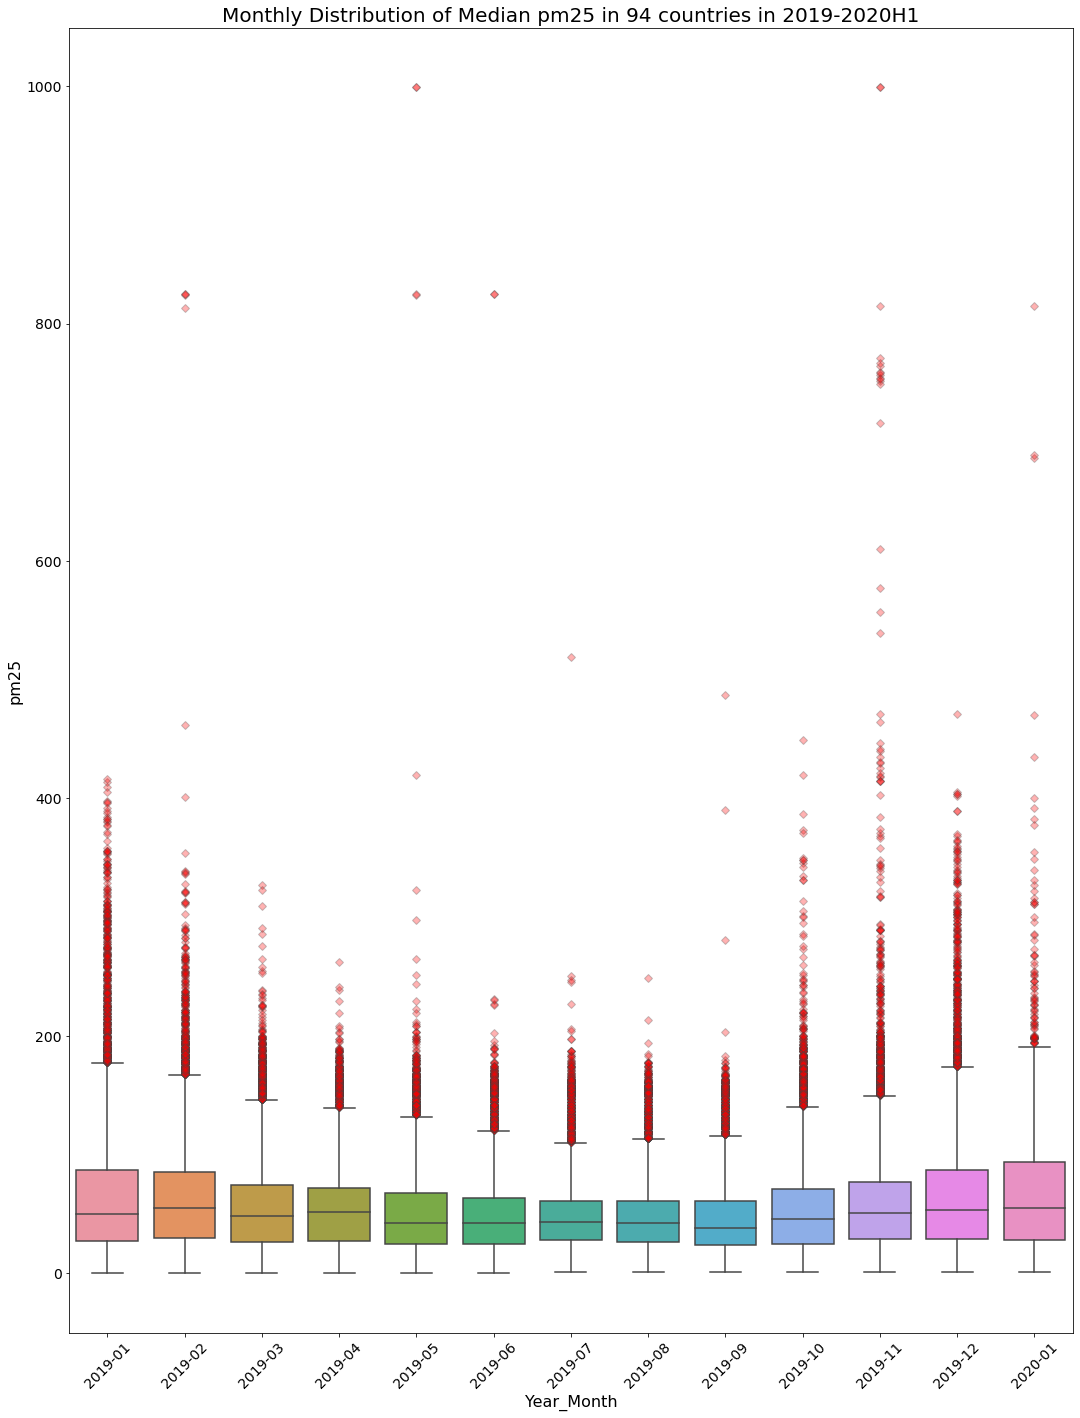

In [206]:
specie_boxplot("pm25")

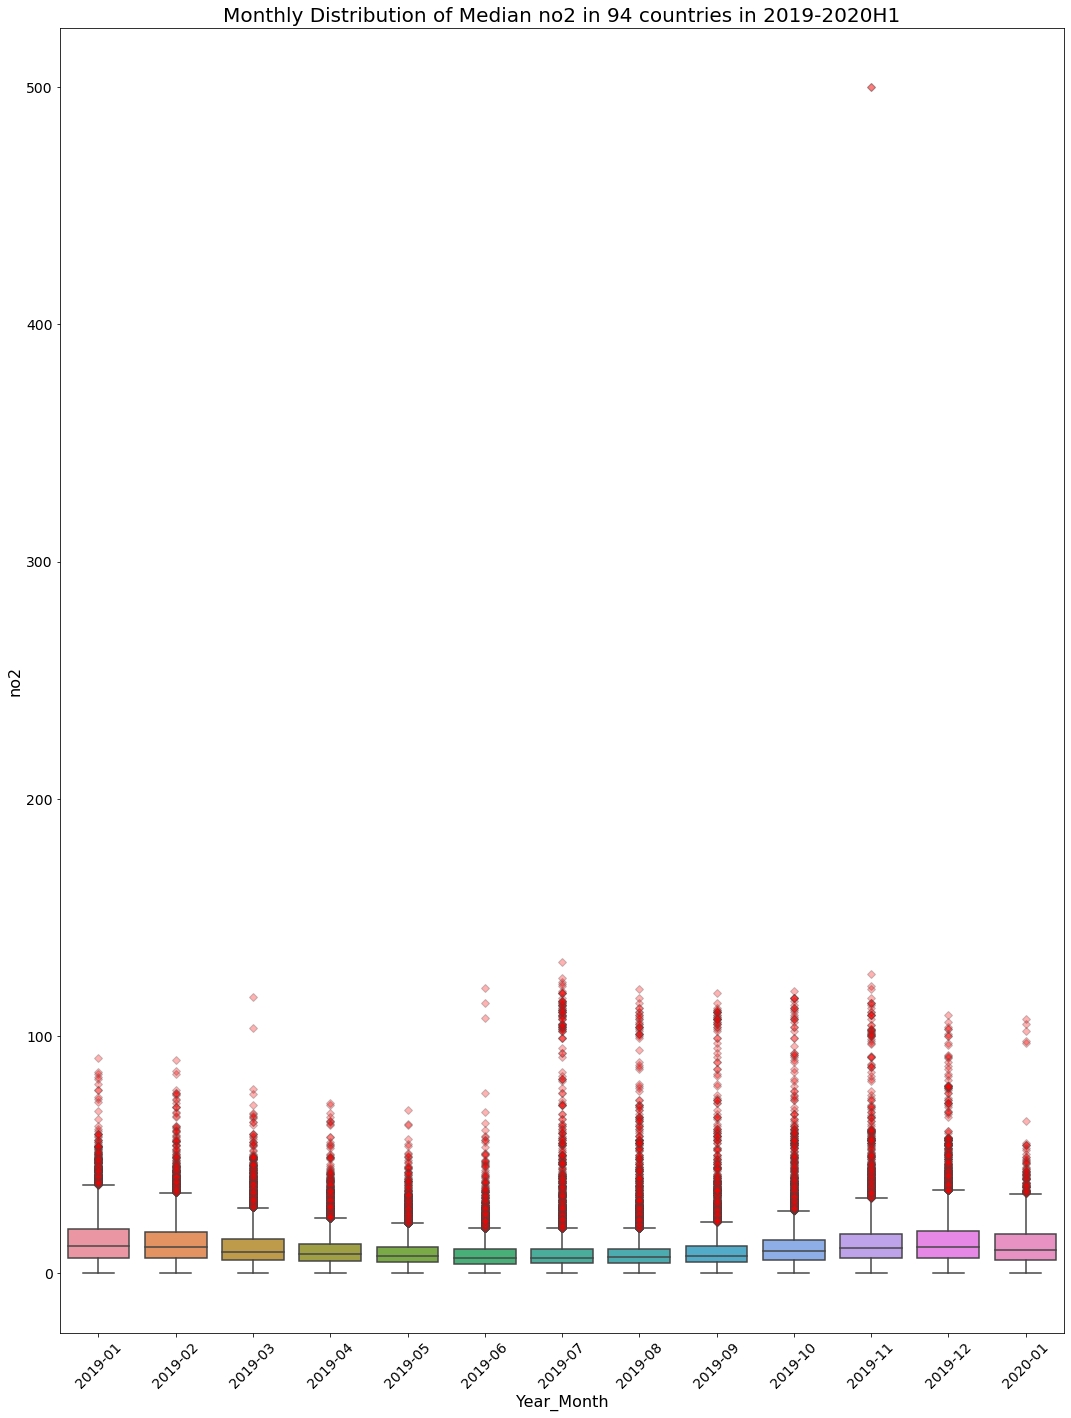

In [207]:
specie_boxplot("no2")

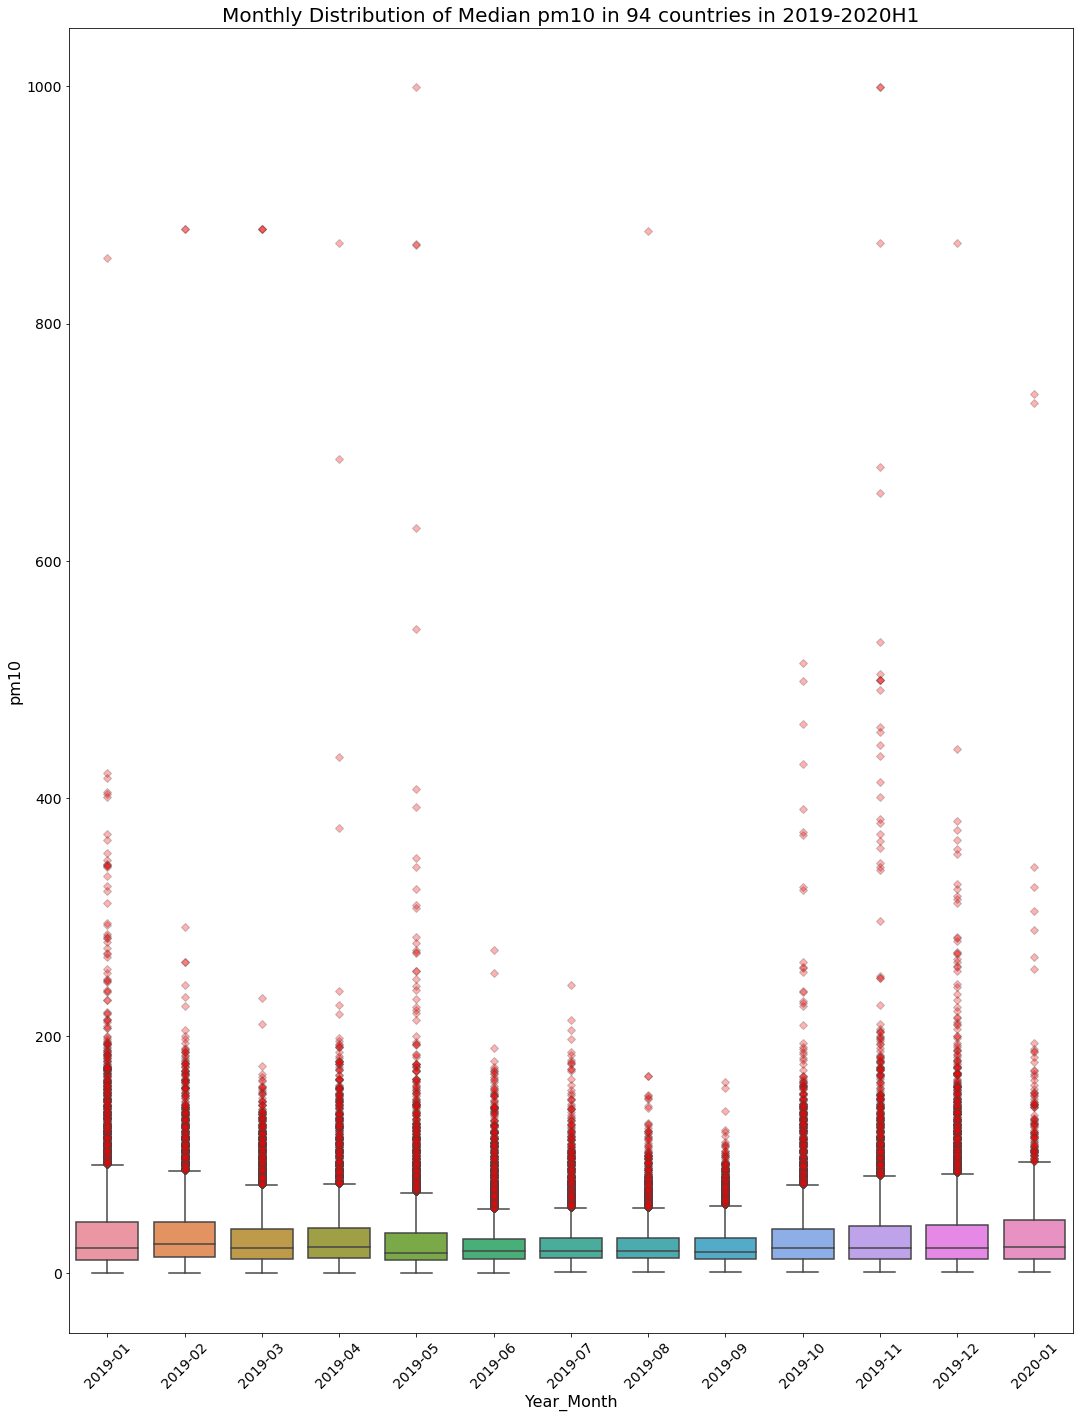

In [208]:
specie_boxplot("pm10")

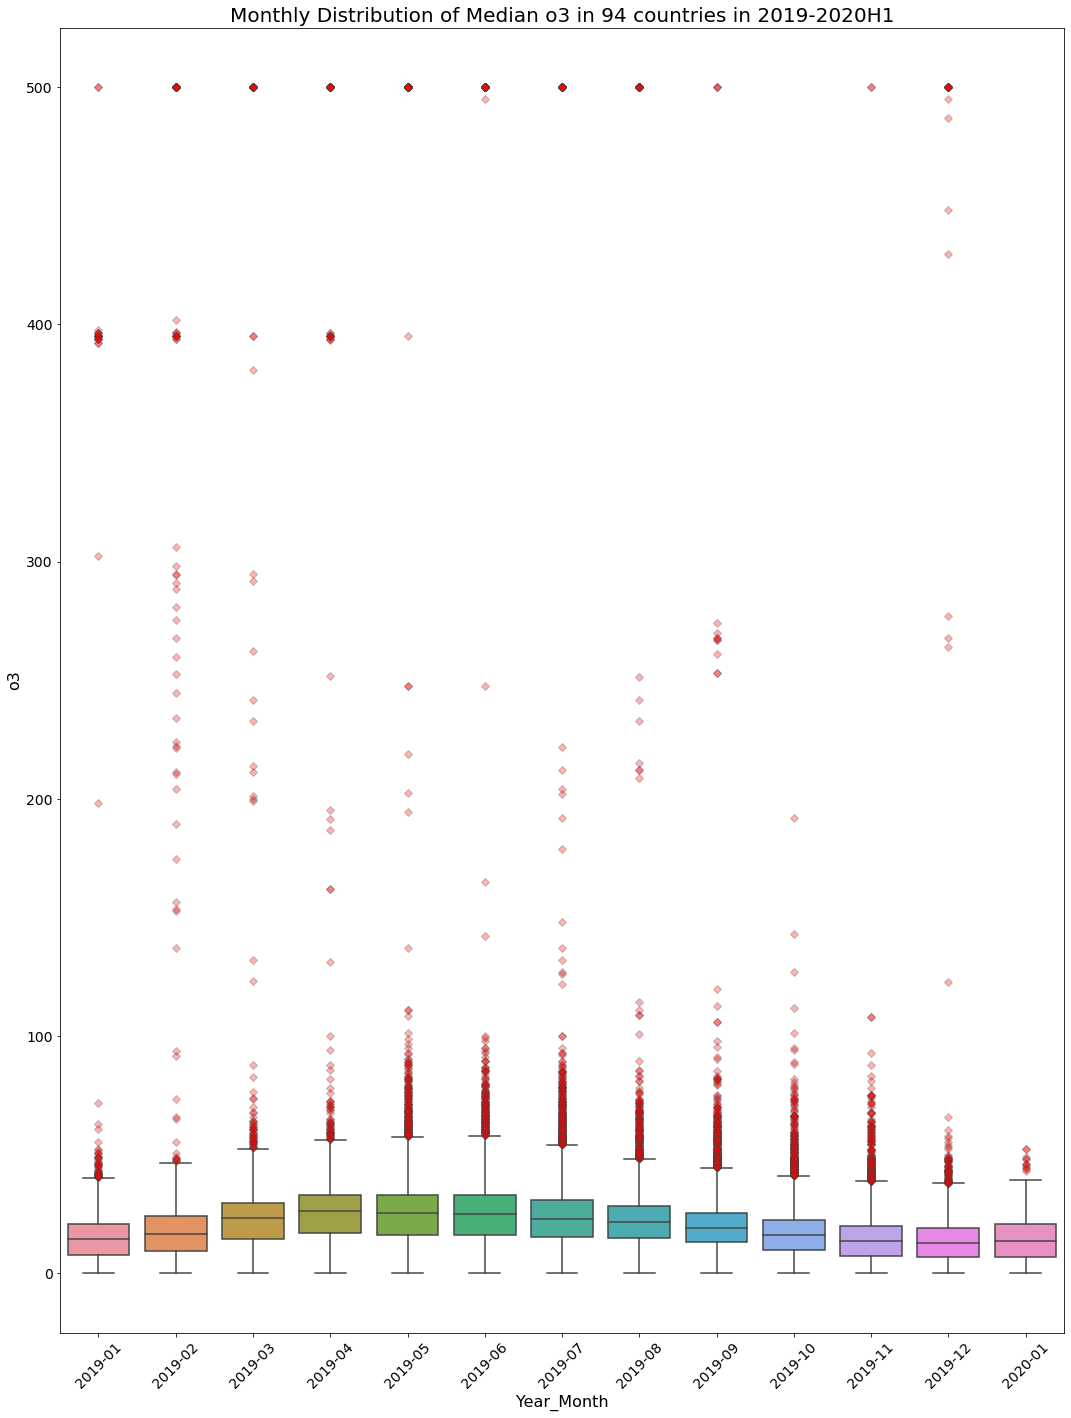

In [209]:
specie_boxplot("o3")

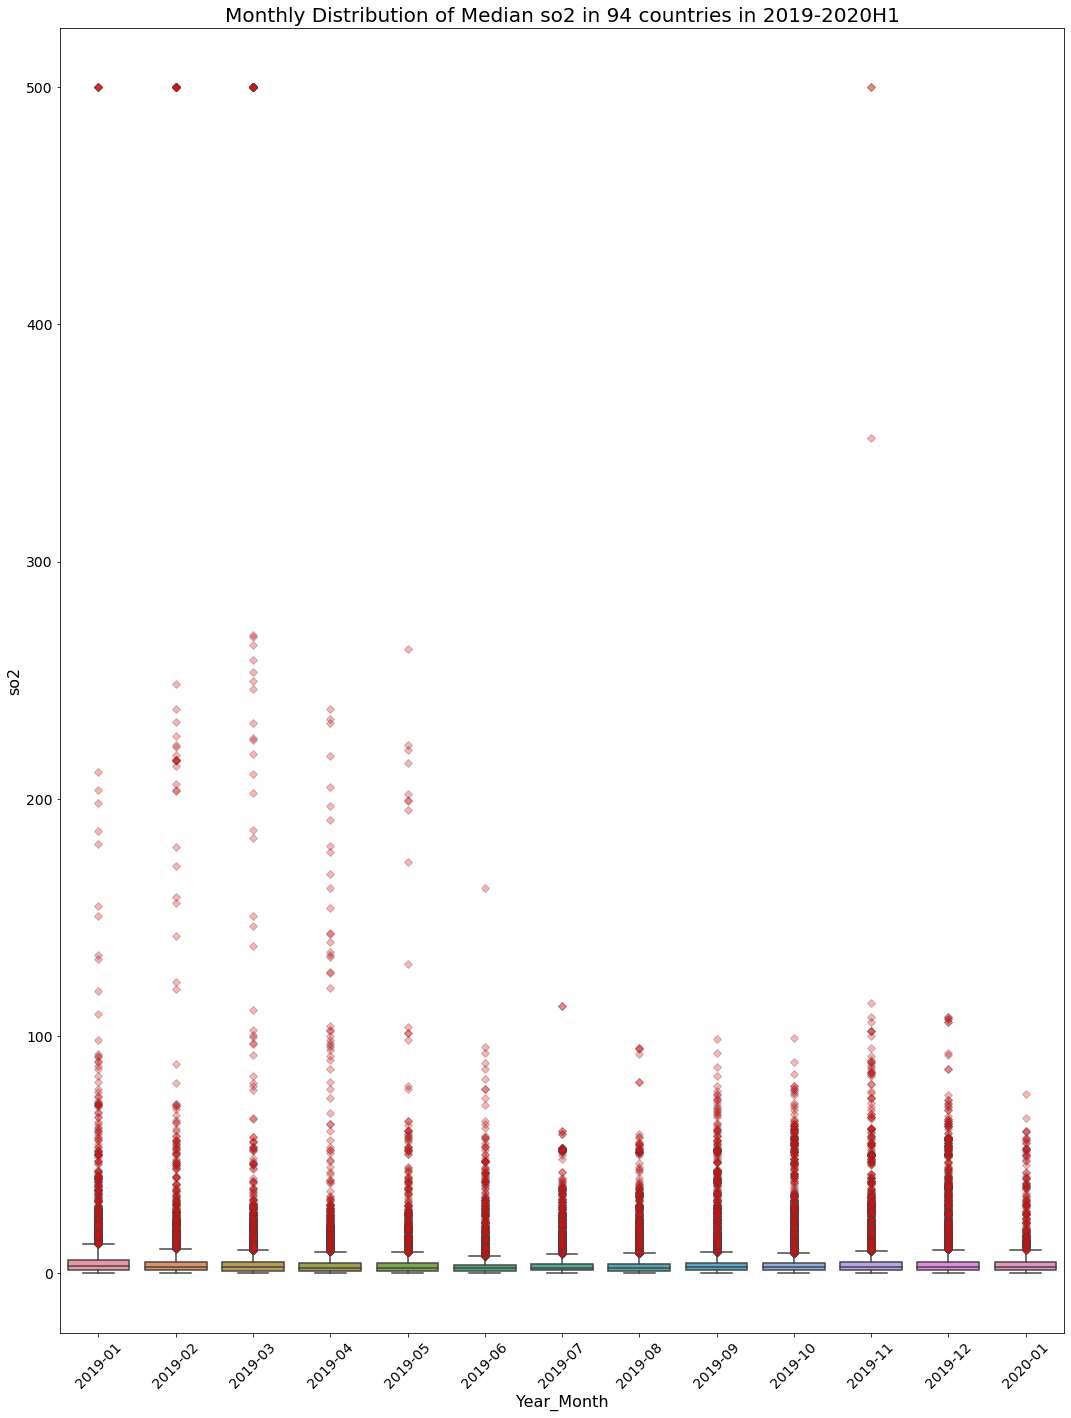

In [210]:
specie_boxplot("so2")

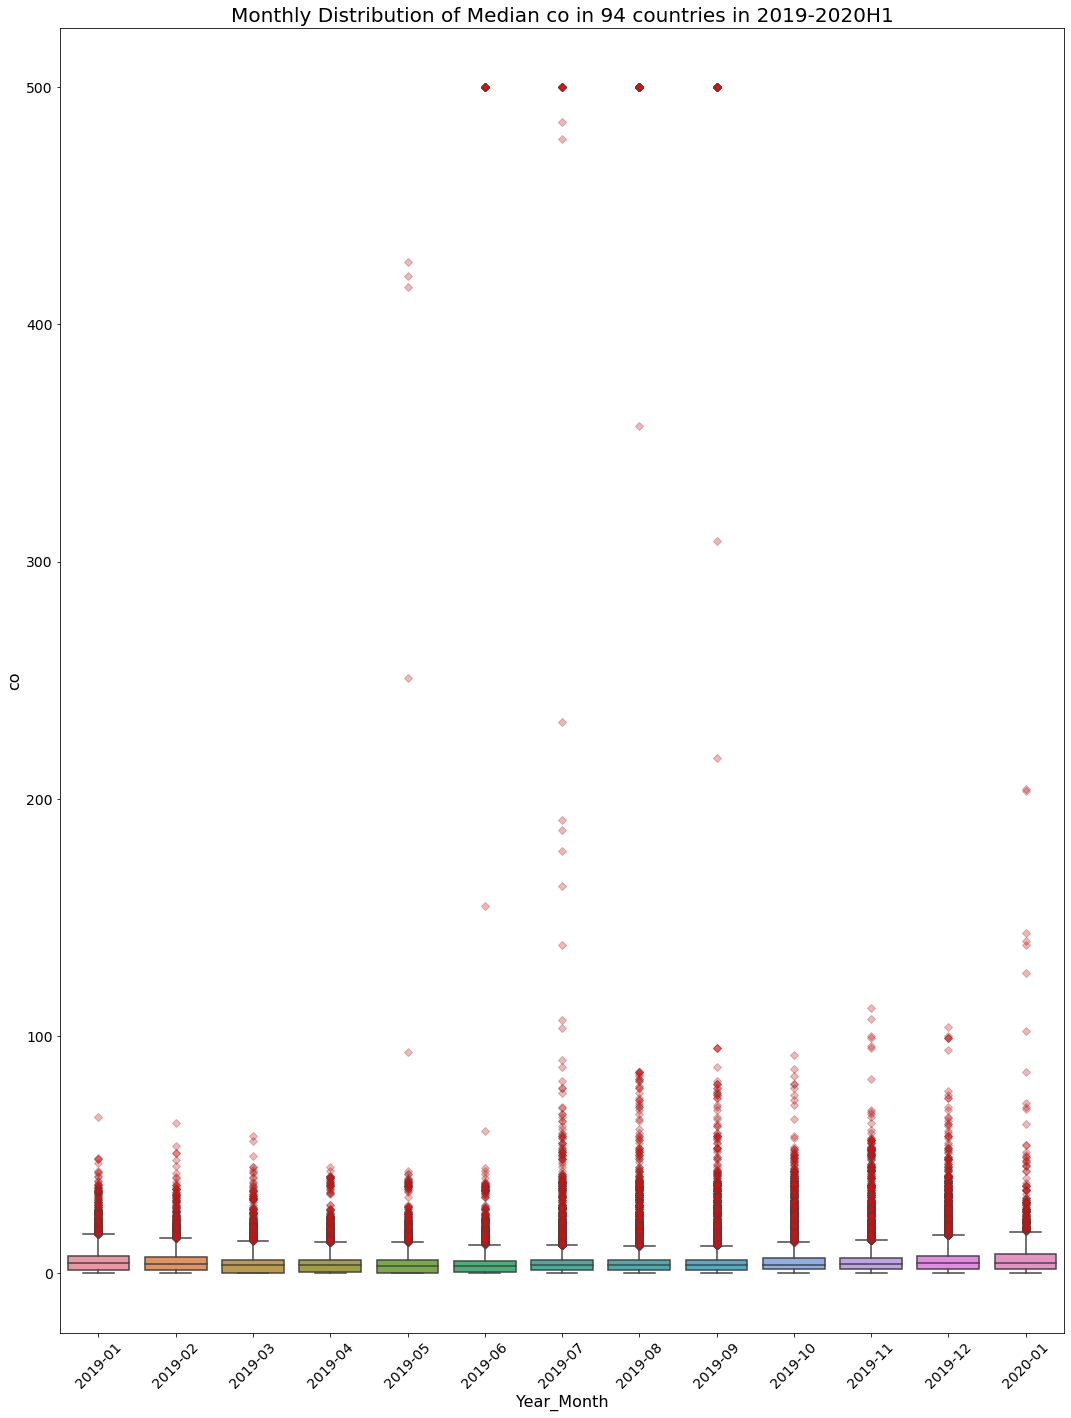

In [211]:
specie_boxplot("co")

# World COVID-19 Data Clean Up

In [232]:
# Use the following api to get the country name, country code and slug
country_url = "https://api.covid19api.com/countries"
country_covid_data = requests.get(country_url).json()
pprint(country_covid_data)

[{'Country': 'Congo (Kinshasa)', 'ISO2': 'CD', 'Slug': 'congo-kinshasa'},
 {'Country': 'Lithuania', 'ISO2': 'LT', 'Slug': 'lithuania'},
 {'Country': 'Montenegro', 'ISO2': 'ME', 'Slug': 'montenegro'},
 {'Country': 'Namibia', 'ISO2': 'NA', 'Slug': 'namibia'},
 {'Country': 'Pakistan', 'ISO2': 'PK', 'Slug': 'pakistan'},
 {'Country': 'Slovenia', 'ISO2': 'SI', 'Slug': 'slovenia'},
 {'Country': 'Luxembourg', 'ISO2': 'LU', 'Slug': 'luxembourg'},
 {'Country': 'Malawi', 'ISO2': 'MW', 'Slug': 'malawi'},
 {'Country': 'Guinea', 'ISO2': 'GN', 'Slug': 'guinea'},
 {'Country': 'Bosnia and Herzegovina',
  'ISO2': 'BA',
  'Slug': 'bosnia-and-herzegovina'},
 {'Country': 'Sri Lanka', 'ISO2': 'LK', 'Slug': 'sri-lanka'},
 {'Country': 'Bouvet Island', 'ISO2': 'BV', 'Slug': 'bouvet-island'},
 {'Country': 'Guadeloupe', 'ISO2': 'GP', 'Slug': 'guadeloupe'},
 {'Country': 'Faroe Islands', 'ISO2': 'FO', 'Slug': 'faroe-islands'},
 {'Country': 'Vanuatu', 'ISO2': 'VU', 'Slug': 'vanuatu'},
 {'Country': 'Zimbabwe', 'ISO2

In [233]:
# Create the country code dataframe
country_covid_df = pd.DataFrame(country_covid_data)
country_covid_df

,Country,Slug,ISO2
0,Congo (Kinshasa),congo-kinshasa,CD
1,Lithuania,lithuania,LT
2,Montenegro,montenegro,ME
3,Namibia,namibia,NA
4,Pakistan,pakistan,PK
...,...,...,...
243,Eritrea,eritrea,ER
244,Turkmenistan,turkmenistan,TM
245,Cuba,cuba,CU
246,Belarus,belarus,BY


In [234]:
# The country code is used to merge with the air quality data (with country code only)
final_air_df = pd.merge(clean_airdf, country_covid_df, how="inner",
                        left_on="Country", right_on="ISO2", suffixes=("_code", "_name"))
final_air_df.head(10)

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name,Slug,ISO2
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40,United Arab Emirates,united-arab-emirates,AE
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75,United Arab Emirates,united-arab-emirates,AE
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96,United Arab Emirates,united-arab-emirates,AE
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88,United Arab Emirates,united-arab-emirates,AE
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97,United Arab Emirates,united-arab-emirates,AE
5,2019-01-14,AE,Abu Dhabi,pm10,24,65.0,76.0,74.0,88.68,United Arab Emirates,united-arab-emirates,AE
6,2019-01-15,AE,Abu Dhabi,pm10,24,76.0,97.0,83.0,637.66,United Arab Emirates,united-arab-emirates,AE
7,2019-01-21,AE,Abu Dhabi,pm10,24,52.0,59.0,58.0,69.98,United Arab Emirates,united-arab-emirates,AE
8,2019-01-08,AE,Abu Dhabi,pm10,24,92.0,98.0,97.0,26.79,United Arab Emirates,united-arab-emirates,AE
9,2019-01-17,AE,Abu Dhabi,pm10,24,74.0,85.0,77.0,199.55,United Arab Emirates,united-arab-emirates,AE


In [235]:
# Delete the ISO2 which is identical to the country_code column
del final_air_df["ISO2"]
final_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name,Slug
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40,United Arab Emirates,united-arab-emirates
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75,United Arab Emirates,united-arab-emirates
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96,United Arab Emirates,united-arab-emirates
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88,United Arab Emirates,united-arab-emirates
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97,United Arab Emirates,united-arab-emirates


In [236]:
final_air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984247 entries, 0 to 984246
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          984247 non-null  datetime64[ns]
 1   Country_code  984247 non-null  object        
 2   City          984247 non-null  object        
 3   Specie        984247 non-null  object        
 4   count         984247 non-null  int64         
 5   min           984247 non-null  float64       
 6   max           984247 non-null  float64       
 7   median        984247 non-null  float64       
 8   variance      984247 non-null  float64       
 9   Country_name  984247 non-null  object        
 10  Slug          984247 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 90.1+ MB


In [237]:
slug_list = final_air_df["Slug"].unique().tolist()
len(slug_list)

90

In [238]:
# Use the slug list to loop through the Covid-19 API by all case status for each country.
base_covid_url = "https://api.covid19api.com/total/country/"

country_list = list()
date_list = list()
active_list = list()
confirmed_list = list()
recovered_list = list()
deaths_list = list()

print("Beginning Data Retrieval")
print("-----------------------------------")

counter = 0
set_counter = 1

for slug in slug_list:

    try:
        response = requests.get(base_covid_url + slug).json()

        for element in response:
            country_list.append(element['Country'])
            date_list.append(element['Date'])
            active_list.append(element['Active'])
            confirmed_list.append(element['Confirmed'])
            recovered_list.append(element['Recovered'])
            deaths_list.append(element['Deaths'])

        counter += 1
        print(f"Processing Record {counter} of Set {set_counter} | {slug}")

        if counter == 50:
            set_counter += 1
            counter = 0

    except KeyError:
        print("Country not found. Skipping...")

print("-----------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | united-arab-emirates
Processing Record 2 of Set 1 | czech-republic
Processing Record 3 of Set 1 | singapore
Processing Record 4 of Set 1 | austria
Processing Record 5 of Set 1 | belgium
Processing Record 6 of Set 1 | korea-south
Processing Record 7 of Set 1 | mongolia
Processing Record 8 of Set 1 | norway
Processing Record 9 of Set 1 | nepal
Processing Record 10 of Set 1 | peru
Processing Record 11 of Set 1 | bosnia-and-herzegovina
Processing Record 12 of Set 1 | brazil
Processing Record 13 of Set 1 | israel
Processing Record 14 of Set 1 | india
Processing Record 15 of Set 1 | iran
Processing Record 16 of Set 1 | new-zealand
Processing Record 17 of Set 1 | ukraine
Processing Record 18 of Set 1 | united-states
Processing Record 19 of Set 1 | france
Processing Record 20 of Set 1 | kuwait
Processing Record 21 of Set 1 | réunion
Processing Record 22 of Set 1 | turkey
Processing Record 23 of Set 1 | 

In [267]:
# Create the world covid dataframe
covid_df = pd.DataFrame({
    "Country": country_list,
    "Date": date_list,
    "Active cases": active_list,
    "Confirmed cases": confirmed_list,
    "Recovered cases": recovered_list,
    "Deaths": deaths_list
})
covid_df.head()

,Country,Date,Active cases,Confirmed cases,Recovered cases,Deaths
0,United Arab Emirates,2020-01-22T00:00:00Z,0,0,0,0
1,United Arab Emirates,2020-01-23T00:00:00Z,0,0,0,0
2,United Arab Emirates,2020-01-24T00:00:00Z,0,0,0,0
3,United Arab Emirates,2020-01-25T00:00:00Z,0,0,0,0
4,United Arab Emirates,2020-01-26T00:00:00Z,0,0,0,0


In [268]:
# Overview of the covid dataframe
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44200 entries, 0 to 44199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          44200 non-null  object
 1   Date             44200 non-null  object
 2   Active cases     44200 non-null  int64 
 3   Confirmed cases  44200 non-null  int64 
 4   Recovered cases  44200 non-null  int64 
 5   Deaths           44200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.0+ MB


In [269]:
# Convert the Date column to datetime format
covid_df['Date'] = covid_df['Date'].astype('datetime64[ns]')

In [270]:
# Find the earliest date the covid dataset covers:
covid_df["Date"].min()

Timestamp('2020-01-22 00:00:00')

In [271]:
# Find the latest date the covid dataset covers:
covid_df["Date"].max()

Timestamp('2021-06-24 00:00:00')

In [272]:
# Set cutoff date to the 1st July 2020
world_covid_df = covid_df[covid_df["Date"] <= end_date]

In [273]:
# Overview of world_covid_df after setting cutoff date
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44200 entries, 0 to 44199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          44200 non-null  object        
 1   Date             44200 non-null  datetime64[ns]
 2   Active cases     44200 non-null  int64         
 3   Confirmed cases  44200 non-null  int64         
 4   Recovered cases  44200 non-null  int64         
 5   Deaths           44200 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.0+ MB


In [274]:
# Check the number of unique countries in the world_covid_df
covid_df["Country"].nunique()

85

In [276]:
# Export the list of countries that are shared by the air data and world covid data
air_covid_common_country_list = covid_df["Country"].unique().tolist()
air_covid_common_country_list

['United Arab Emirates',
 'Czech Republic',
 'Singapore',
 'Austria',
 'Belgium',
 'Korea (South)',
 'Mongolia',
 'Norway',
 'Nepal',
 'Peru',
 'Bosnia and Herzegovina',
 'Brazil',
 'Israel',
 'India',
 'Iran, Islamic Republic of',
 'New Zealand',
 'Ukraine',
 'United States of America',
 'France',
 'Kuwait',
 'Turkey',
 'Republic of Kosovo',
 'Uzbekistan',
 'Finland',
 'Japan',
 'Kazakhstan',
 'Romania',
 'Russian Federation',
 'Slovakia',
 'Spain',
 'Croatia',
 'Thailand',
 'Sri Lanka',
 'Argentina',
 'Canada',
 'Switzerland',
 'Chile',
 'Ethiopia',
 'Kyrgyzstan',
 'Germany',
 'Mexico',
 'Saudi Arabia',
 'Uganda',
 'Bangladesh',
 'Hungary',
 'Iceland',
 'Philippines',
 'Indonesia',
 'Sweden',
 'El Salvador',
 'Viet Nam',
 'Australia',
 'Bahrain',
 'United Kingdom',
 'Ireland',
 'Lao PDR',
 'Lithuania',
 'Portugal',
 'Taiwan, Republic of China',
 'China',
 'Poland',
 'Bulgaria',
 'Cyprus',
 'Iraq',
 'Macedonia, Republic of',
 'Bolivia',
 'Denmark',
 'Ecuador',
 'South Africa',
 'Colom

In [277]:
# Filter out the air quality data to contain only the above countries
final_clean_air_df = final_air_df[final_air_df["Country_name"].isin(
    air_covid_common_country_list)]
final_clean_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name,Slug
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40,United Arab Emirates,united-arab-emirates
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75,United Arab Emirates,united-arab-emirates
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96,United Arab Emirates,united-arab-emirates
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88,United Arab Emirates,united-arab-emirates
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97,United Arab Emirates,united-arab-emirates


In [278]:
# Double check the number of countries in the final clean air data
final_clean_air_df["Country_name"].nunique()

85

In [279]:
del final_clean_air_df["Slug"]
final_clean_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40,United Arab Emirates
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75,United Arab Emirates
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96,United Arab Emirates
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88,United Arab Emirates
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97,United Arab Emirates


In [ ]:
# Export the air data to csv file for future use
final_clean_air_df.to_csv("output_csv/clean_world_air.csv", index=False)